In [229]:
import numpy as np
import pandas as pd
import fastplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import yscale
from numpy.lib.function_base import quantile
from pandas import value_counts
%matplotlib inline
import seaborn as sns
from adjustText import adjust_text
import json
import glob
import os

In [230]:
sns.set_style("whitegrid") 
sns.set_context("paper")

In [231]:
log_list = sorted(glob.glob("../log/log_11-12/*_stat.csv"), key=os.path.getmtime)
latest_log_file = log_list[-1]
latest_log_file

'../log/log_11-12/buf10000_GCsize5000_GCperiod10000_T20000_stat.csv'

# Packet Processing Time

In [232]:
raw_df = pd.read_csv(latest_log_file)
raw_df['time'] = raw_df['time'] - raw_df['time'].min()
raw_df.head()

,time,level,file,line,msg,pkt_count,tcp_pkt_count_tot,udp_pkt_count_tot,icmp_pkt_count_tot,unsupported_pkt_count,...,replied_flow_count_tcp,replied_flow_count_udp,replied_flow_count_icmp,expired_pkt_count_tot,expired_pkt_count_tcp,expired_pkt_count_udp,expired_pkt_count_icmp,active_host_tbl_entry_count,local_entry_count,send_pkt_error_count
0,0.000000,STATS,src/tsdn.c,555,batch_processing_time,500,2746.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,STATS,src/tsdn.c,556,pkt_processing_time,500,101.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.002555,STATS,src/tsdn.c,555,batch_processing_time,1000,2385.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.002555,STATS,src/tsdn.c,556,pkt_processing_time,1000,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.005071,STATS,src/tsdn.c,555,batch_processing_time,1500,2451.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
stats_df = raw_df[raw_df['msg'] == 'stats']
stats_df.drop(columns=['level', 'file', 'line', 'msg'], inplace=True)
stats_df.reset_index(inplace=True, drop=True)

pkt_process_time_df = raw_df[raw_df['msg'] == 'pkt_processing_time'][['time', 'pkt_count', 'tcp_pkt_count_tot']]
pkt_process_time_df.columns = ['time', 'sample_at', 'pkt_process_time']
pkt_process_time_df.reset_index(inplace=True)
print(pkt_process_time_df.head())

pkt_pps_df = raw_df[raw_df['msg'] == 'batch_processing_time'][['time', 'pkt_count', 'tcp_pkt_count_tot']]
pkt_pps_df.columns = ['time', 'sample_at', 'kpps']
pkt_pps_df.reset_index(inplace=True, drop=True)
pkt_pps_df = pkt_pps_df[1:]
pkt_pps_df.reset_index(inplace=True, drop=True)
batch_size = pkt_pps_df['sample_at'][1] - pkt_pps_df['sample_at'][0]
pkt_pps_df['kpps'] = (batch_size / pkt_pps_df['kpps']) * 1000000 / 1000
print(pkt_pps_df.head())

timeout_df = raw_df[raw_df['msg'] == 'timeout'][['time', 'pkt_count']]
timeout_df.columns = ['time', 'timeout']
timeout_df.reset_index(inplace=True, drop=True)
print(timeout_df.head())

   index      time  sample_at  pkt_process_time
0      1  0.000000        500             101.0
1      3  0.002555       1000              18.0
2      5  0.005071       1500               4.0
3      8  0.007972       2000               5.0
4     10  0.011158       2500               7.0
       time  sample_at        kpps
0  0.002555       1000  209.643606
1  0.005071       1500  203.998368
2  0.007972       2000  175.131349
3  0.011158       2500  158.277936
4  0.014235       3000  164.473684
       time  timeout
0  0.047414    27420
1  0.087428    32921
2  0.127460    33295
3  0.167490    31730
4  0.207514    23862


/tmp/ipykernel_1510/3919725813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df.drop(columns=['level', 'file', 'line', 'msg'], inplace=True)


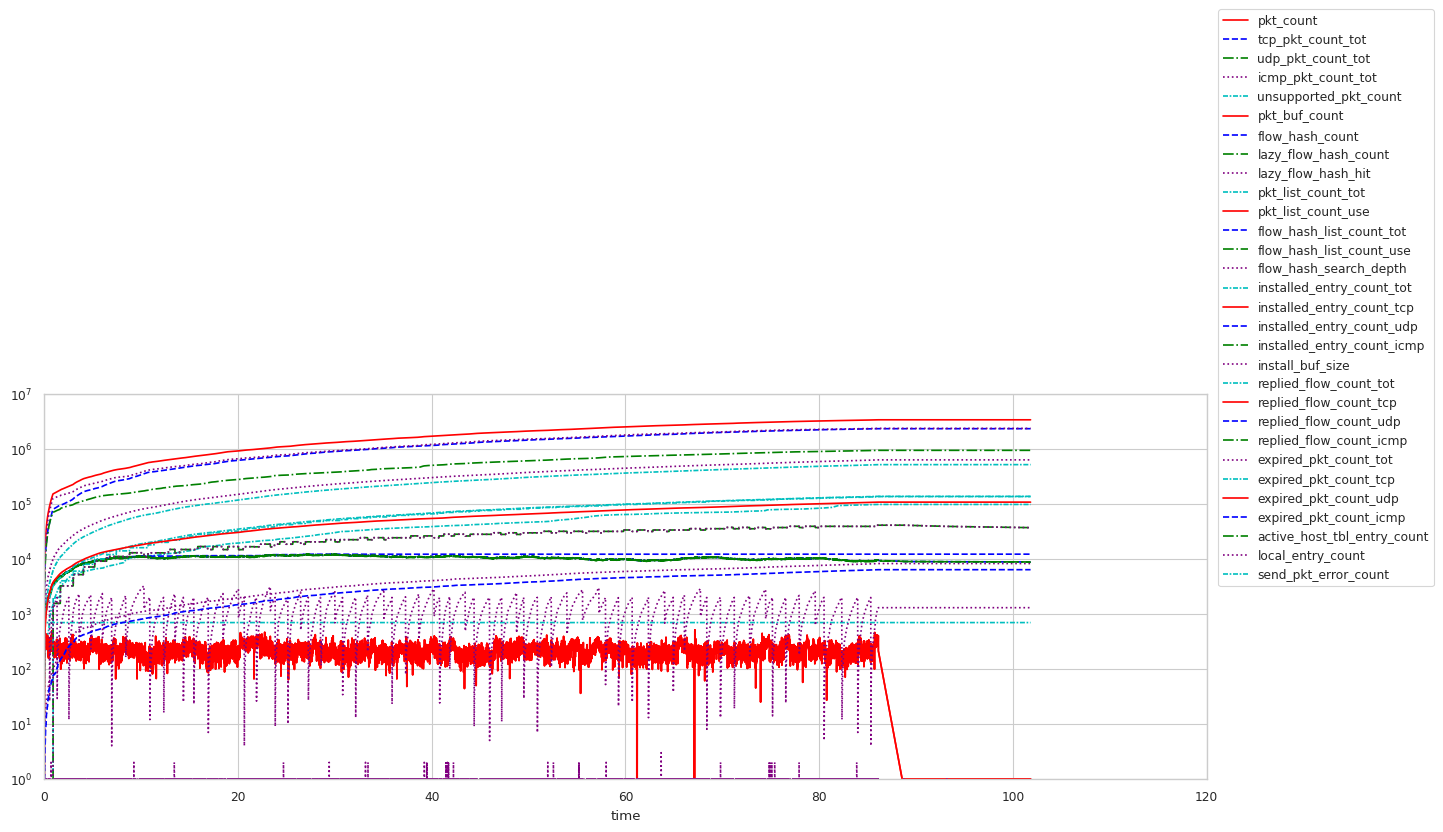

In [234]:
stats_df.plot(x='time', y=stats_df.columns[1:], figsize=(15, 5))
plt.yscale('log')
plt.legend(loc=[1.01, 0.5])
plt.show()

<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

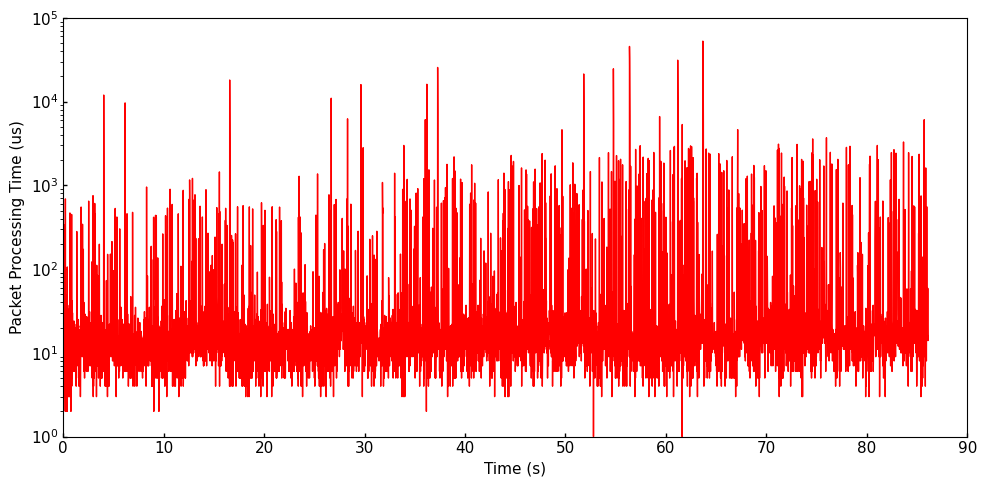

In [235]:
fastplot.plot((pkt_process_time_df['time'], pkt_process_time_df['pkt_process_time']), None, mode='line',
              figsize=(10, 5), xlabel='Time (s)', ylabel='Packet Processing Time (us)',
              yscale='log')

<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

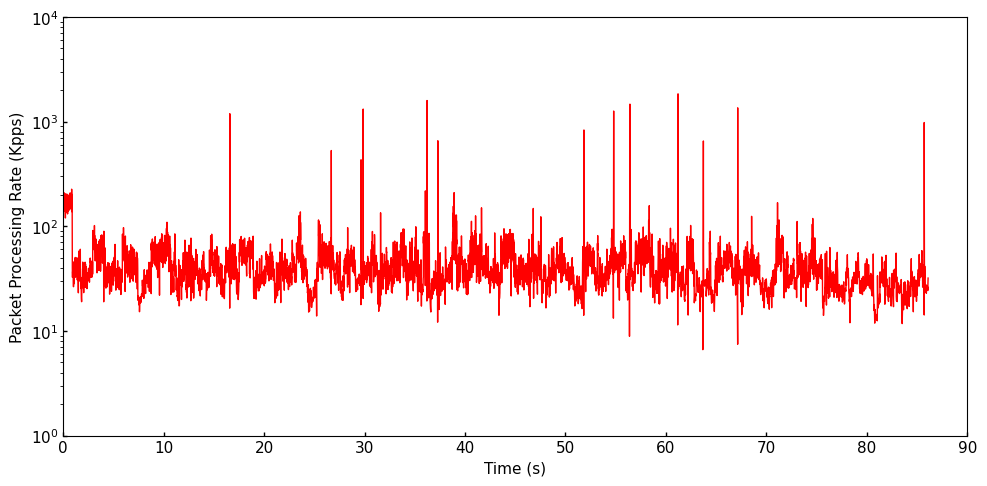

In [236]:
fastplot.plot((pkt_pps_df['time'], pkt_pps_df['kpps']), None, mode='line',
              figsize=(10, 5), xlabel='Time (s)', 
              yscale='log',
              ylabel='Packet Processing Rate (Kpps)')

([Text(0.1728494623655914, 19.48730409457931, '75%: 21'),
  Text(0.1686559139784946, 424.68403423258235, '95%: 458'),
  Text(0.1644086021505376, 2646.9802980263726, '99%: 2456')],
 [])

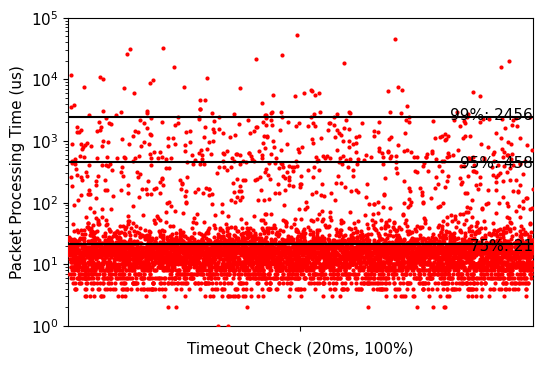

In [237]:
plt.figure(figsize=(6, 4))
sns.stripplot(y='pkt_process_time', 
              size=3, legend=False,
              data=pkt_process_time_df, jitter=0.2)
plt.ylabel('Packet Processing Time (us)')
plt.xlabel('Timeout Check (20ms, 100%)')
plt.yscale('log')


texts = []
for index, ratio in enumerate(['(10ms, 1)']):
    for q in [75, 95, 99]:
        quantile = pkt_process_time_df['pkt_process_time'].quantile(q/100)
        plt.hlines(quantile, index-0.2, index+0.2, colors='black', zorder=10)
        texts.append(plt.text(index+0.25, quantile, f'{q}%: {quantile:.0f}', ha='center', va='center', color='black'))

adjust_text(texts, avoid_self=True, only_move={"text": "y", "static": "y", "explore": '', 'pull': ''}, explode_radius=0)


# Timeout Bias (real buffered time (avg) - expected buffered time)

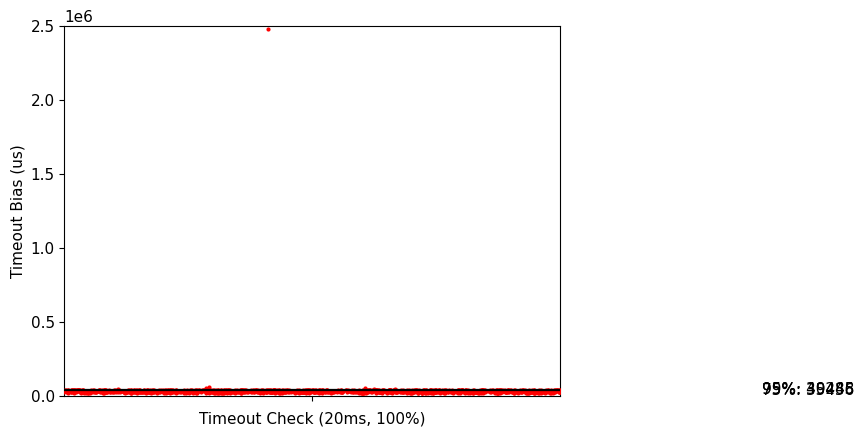

In [238]:
sns.stripplot(y='timeout', 
              size=3, legend=False,
              data=timeout_df, 
              jitter=0.2)
plt.ylabel('Timeout Bias (us)')
plt.xlabel('Timeout Check (20ms, 100%)')

texts = []
for index, ratio in enumerate(['(10ms, 1)']):
    for q in [75, 95, 99]:
        quantile = timeout_df['timeout'].quantile(q/100)
        plt.hlines(quantile, index-0.2, index+0.2, colors='black', zorder=10)
        texts.append(plt.text(index+0.4, quantile, f'{q}%: {quantile:.0f}', ha='center', va='center', color='black'))
    
# adjust_text(texts, avoid_self=True, only_move={"text": "y", "static": "y", "explore": '', 'pull': ''}, explode_radius=0)

# Data Structure Usage

In [239]:
from cycler import cycler

mcolor_lists = ['red', 'red', 'blue', 'blue', 'tab:green','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'b', 'g', 'r', 'c', 'm', 'y', 'k',
                'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'rosybrown', 'tomato', 'yellowgreen', 'lightseagreen', 'navy', 'deeppink',
                'darkslategray', 'darkolivegreen', 'darkcyan', 'darkviolet', 'mediumslateblue', 'darkorange', 'gold', 'peru', 'darkkhaki']
CYCLER_LINES=(cycler('color', mcolor_lists[:30]) +
              cycler('linestyle', ['-', '--','-', '--','-', '--','-', '--', '-.', ':', (0, (10, 6)), (0, (6, 10)), (0, (5, 5)), (0, (5, 10)), (0, (3, 10)), (0, (3, 1, 1, 1)),
                                   '-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (1, 10)), (0,
                                                                                           (10, 6)), (0, (5, 5)), (0, (5, 10)), (0, (3, 10)),
                                   '-', '--', '-.', ':']))

<Figure size 640x480 with 0 Axes>

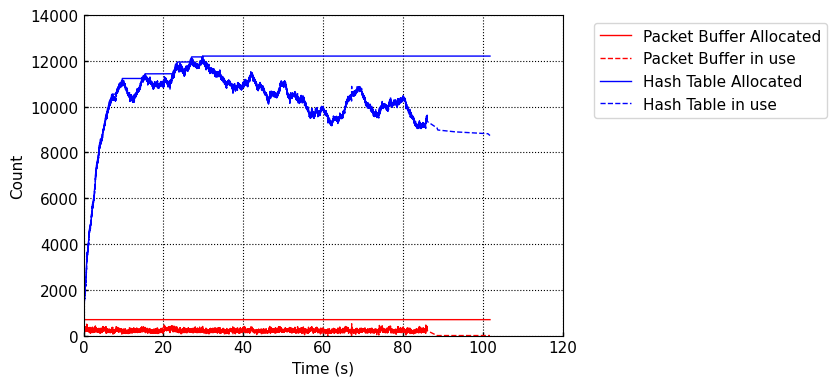

In [240]:
# buffered packet count

fastplot.plot([('Packet Buffer Allocated', (stats_df['time'], stats_df['pkt_list_count_tot'])),
              ('Packet Buffer in use', (stats_df['time'], stats_df['pkt_list_count_use'])),
               ('Hash Table Allocated', (stats_df['time'], stats_df['flow_hash_list_count_tot'])),
              ('Hash Table in use', (stats_df['time'], stats_df['flow_hash_list_count_use']))
              ],
              None,
              mode='line_multi',
              legend=True, 
              figsize=(6, 4), grid=True,
              # xlim=(stats_df['time'].min(), stats_df['time'].min() + pd.Timedelta('5 seconds')),
              # yscale='log', ylim=(10**3, 10**4),
              cycler=CYCLER_LINES,
              xlabel='Time (s)', 
              ylabel='Count')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0))


<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

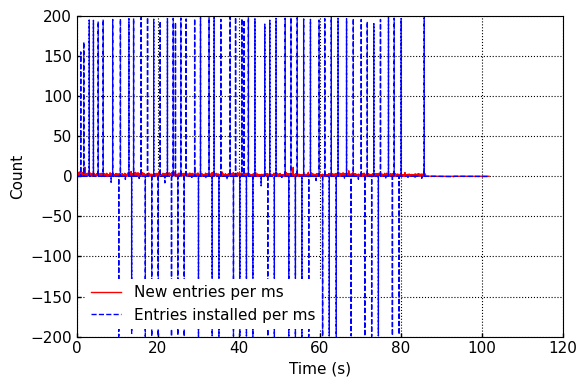

In [241]:
new_entry_cnt_ms = stats_df['replied_flow_count_tot'].diff()[1:]
instal_entry_cnt_ms = stats_df['active_host_tbl_entry_count'].diff()[1:]
# removed_entry_cnt_ms = stats_df['removed_entry_count_tot'].diff()[1:]
time_diff = stats_df['time'].diff()[1:] * 1000
new_entry_cnt_ms = new_entry_cnt_ms / time_diff
instal_entry_cnt_ms = instal_entry_cnt_ms / time_diff

fastplot.plot([('New entries per ms', (stats_df['time'][1:], new_entry_cnt_ms)),
                ('Entries installed per ms', (stats_df['time'][1:], instal_entry_cnt_ms))],
                None,
                mode='line_multi',
                legend=True, legend_loc='best',
                figsize=(6, 4), grid=True,
                xlabel='Time (s)', 
                ylabel='Count')

# Data Plane Resource Usage

## Table Entry Count

<module 'matplotlib.pyplot' from '/home/zhihaow/codes/honeypot_c_controller/.venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

<Figure size 640x480 with 0 Axes>

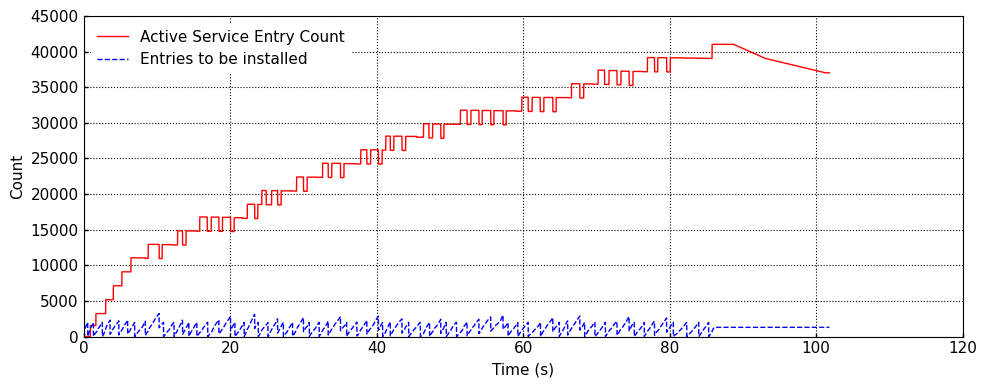

In [242]:

fastplot.plot([('Active Service Entry Count', (stats_df['time'], stats_df['active_host_tbl_entry_count'])),
               ('Entries to be installed', (stats_df['time'], stats_df['install_buf_size']))],
              None,
              mode='line_multi',
              legend=True, legend_loc='best',
              figsize=(10, 4), grid=True,
              xlabel='Time (s)', 
              ylabel='Count')

# Network Speed Statistic

In [247]:
net_stat_df_recv = pd.read_csv('../log/net_stat_recv.csv')
net_stat_df_send = pd.read_csv('../log/net_stat_send.csv')

In [254]:
net_stat_df_recv

,time,bits_sent,bits_recv,packets_sent,packets_recv,mem_usage,cpu_usage
0,1.731419e+09,0.0,0.0,0.0,0.0,1921024,6.23750
1,1.731419e+09,0.0,0.0,0.0,0.0,2191159296,0.00000
2,1.731419e+09,0.0,0.0,0.0,0.0,2191159296,0.00000
3,1.731419e+09,0.0,0.0,0.0,0.0,2191159296,0.00000
4,1.731419e+09,0.0,0.0,0.0,0.0,2191159296,0.00000
5,1.731419e+09,0.0,4983484.0,0.0,45816.0,2197753856,6.86250
6,1.731419e+09,0.0,78215156.0,0.0,725736.0,2199371776,6.85625
7,1.731419e+09,0.0,67428268.0,0.0,682104.0,2199875584,8.10000
8,1.731419e+09,0.0,26731388.0,0.0,289512.0,2200412160,7.47500
9,1.731419e+09,0.0,37336692.0,0.0,376856.0,2200678400,8.72500


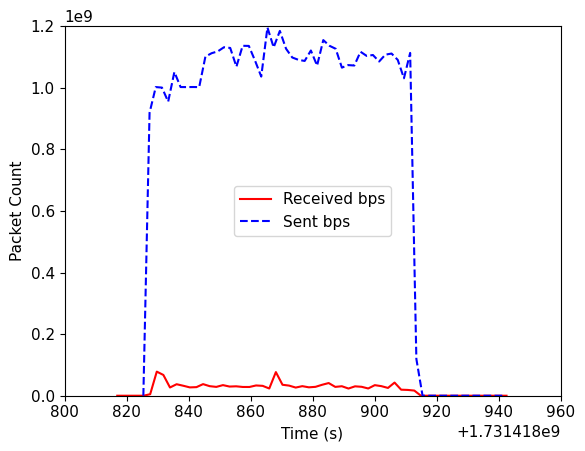

In [252]:
plt.plot(net_stat_df_recv['time'], net_stat_df_recv['bits_recv'], label='Received bps')
plt.plot(net_stat_df_send['time'], net_stat_df_send['bits_sent'], label='Sent bps')
plt.xlabel('Time (s)')
plt.ylabel('Packet Count')
plt.legend()
plt.show()

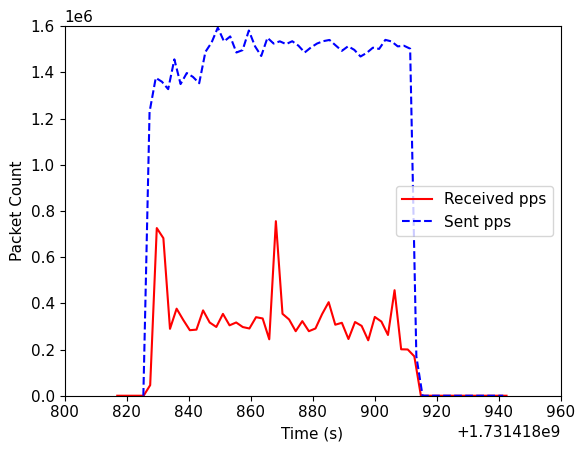

In [255]:
plt.plot(net_stat_df_recv['time'], net_stat_df_recv['packets_recv'], label='Received pps')
plt.plot(net_stat_df_send['time'], net_stat_df_send['packets_sent'], label='Sent pps')
plt.xlabel('Time (s)')
plt.ylabel('Packet Count')
plt.legend()
plt.show()

In [ ]:
# def unit_conversion(bit):
#     bit = int(bit)
#     if bit > 1000:
#         res = bit / 1000
#         if res < 1000:
#             res = float('%.2f' % res)
#             return str(res) + 'K'
#         elif res < 1000 * 1000:
#             res = res / 1000
#             res = float('%.2f' % res)
#             return str(res) + 'M'
#         else:
#             res = res / (1000 * 1000)
#             res = float('%.2f' % res)
#             return str(res) + 'G'
#     else:
#         return str(bit)

In [ ]:
# def bit_to_Gbit(bit):
#     return bit / (1000 * 1000 * 1000)

# def bit_to_Mbit(bit):
#     return bit / (1000 * 1000)

# def byte_to_Gbit(byte):
#     return byte * 8 / (1000 * 1000 * 1000)

In [ ]:
# net_stat_df = pd.read_csv('../log/net_stat.csv')
# net_stat_df['bits_recv'] = net_stat_df['bits_recv'].apply(bit_to_Gbit)
# net_stat_df['bits_sent'] = net_stat_df['bits_sent'].apply(bit_to_Gbit)
# net_stat_df['packets_recv'] = net_stat_df['packets_recv'].apply(bit_to_Mbit)
# net_stat_df['packets_sent'] = net_stat_df['packets_sent'].apply(bit_to_Mbit)
# net_stat_df['time'] = net_stat_df['time'] - net_stat_df['time'].min()

In [ ]:
# fastplot.plot([
#     # ('Sending Speed', (send_speed_df['time'], send_speed_df['tx_speed'])),
#               ('Receiving Data Rate', (net_stat_df['time'], net_stat_df['bits_recv'])),
#               ('Sending Data Rate', (net_stat_df['time'], net_stat_df['bits_sent']))],
#                 None,
#                 mode='line_multi',
#                 legend=True, legend_loc=[0.6, 0.25],
#                 figsize=(6, 4), grid=True,
#                 xlabel='Time (s)', 
#                 ylabel='Data Rate (Gbps)')

In [ ]:
# fastplot.plot([
#     # ('Sending Speed', (send_speed_df['time'], send_speed_df['tx_speed'])),
#               ('Receiving PPS', (net_stat_df['time'], net_stat_df['packets_recv'])),
#               ('Sending PPS', (net_stat_df['time'], net_stat_df['packets_sent']))],
#                 None,
#                 mode='line_multi',
#                 legend=True, legend_loc=[0.6, 0.25],
#                 figsize=(6, 4), grid=True,
#                 xlabel='Time (s)', 
#                 ylabel='Data Rate (Mpps)')